## Classification(Linear Regression)  and Cross Validation

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Population data to predict election result based on religion 

In [2]:
df = pd.read_csv("religion.csv")
df.head()

,promney,rfrac
0,0.047790,0.00
1,0.051199,0.01
2,0.054799,0.02
3,0.058596,0.03
4,0.062597,0.04


Plot

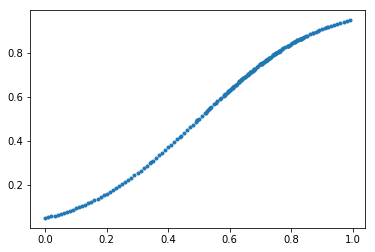

In [23]:
x=df.rfrac.values
f=df.promney.values
plt.plot(x,f,'.')

In [4]:
## function related to plotting
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes

Taking sample from population

In [24]:
#allindexes=np.sort(np.random.choice(x.shape[0], size=100, replace=False))
indexes=np.sort(np.random.choice(x.shape[0], size=30, replace=False))

In [25]:
samplex = x[indexes]
samplef = f[indexes]

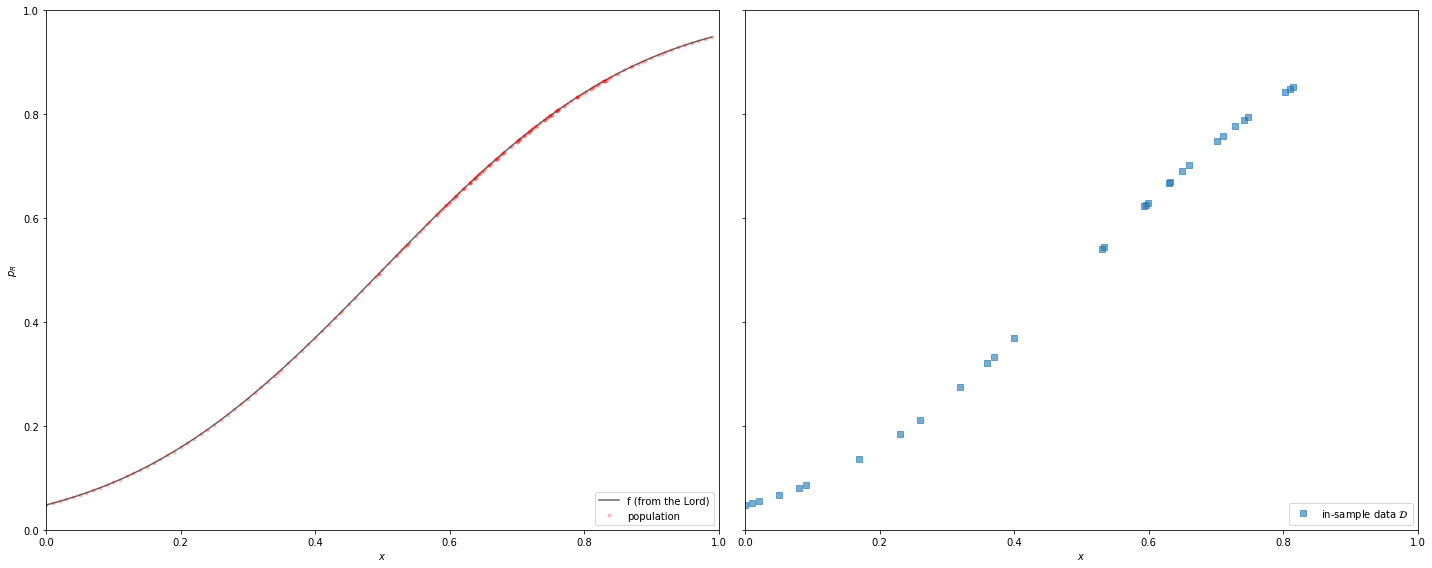

In [26]:
axes=make_plot()
axes[0].plot(x,f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[0].plot(x,f, 'r.', alpha=0.2, label="population");
axes[1].plot(samplex,samplef, 's', alpha=0.6, label="in-sample data $\cal{D}$");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

In [19]:
(axes[0].plot)

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x000001686C975748>>

Line/Function  fitting the sample values

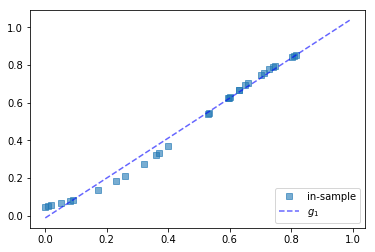

In [39]:
g1 = np.poly1d(np.polyfit(x[indexes],f[indexes],1))
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g1(x), 'b--', alpha=0.6, label="$g_1$");
plt.legend(loc=4);

**Error = Bias (differernece in function fitted and actual values)** 

Fitting 20 degree polynomial


In [40]:
g20 = np.poly1d(np.polyfit(x[indexes],f[indexes],20))

C:\Users\I853328\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


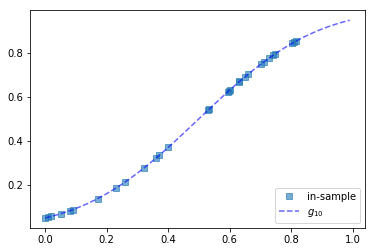

In [42]:
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g20(x), 'b--', alpha=0.6, label="$g_{10}$");
plt.legend(loc=4);

Bias almost zero with 20th degree polynomial function(complex)

Comparing both cases now

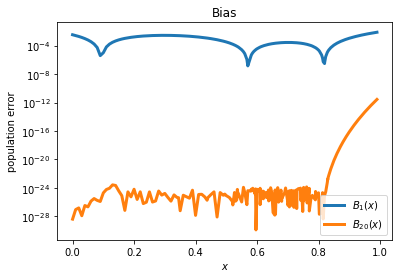

In [43]:
plt.plot(x, (g1(x)-f)**2, lw=3, label="$B_1(x)$")
plt.plot(x, (g20(x)-f)**2, lw=3,label="$B_{20}(x)$");
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Bias");